<a href="https://colab.research.google.com/github/JannatulJinat/Real-Time-Facial-Expression-Recognition/blob/master/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

config
Runtime ->Change runtime type ->select GPU

#Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Ignore all warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

Unzip data

In [3]:
from zipfile import ZipFile
file_path = "/content/drive/My Drive/Colab Notebooks/Thesis/image_data.zip"
with ZipFile(file_path,'r') as zip:
    zip.extractall()
    print("Done") 

Done


#Count data 

In [4]:
import os
for expression in os.listdir("/content/image_data/train"):
    print(expression +" "+str(len(os.listdir("/content/image_data/train/"+expression)))+" "+"images ")

happiness 1440 images 
disgust 1440 images 
sadness 1440 images 
fear 1440 images 
anger 1440 images 
surprise 1440 images 
neutral 1440 images 


#Data Augmentation

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(
                            rescale=1./255,
                            zoom_range=0.1,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/image_data/train/",
                                                    target_size=(image_size,image_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(
                            rescale=1./255,
                            zoom_range=0.1,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True)

validation_generator = datagen_validation.flow_from_directory("/content/image_data/validation/",
                                                    target_size=(image_size,image_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 10080 images belonging to 7 classes.
Found 2520 images belonging to 7 classes.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
#from livelossplot.tf_keras import PlotLossesCallback


#Hyperparameter Tuning

In [12]:
epochs = 120
lr = 0.001
loss = "categorical_crossentropy"
optimizer = Adam(learning_rate =lr )

In [13]:
model = Sequential()

model.add(Conv2D(32 ,(5,5),activation='relu',padding='same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer =optimizer,loss = loss,metrics = ['accuracy'] )
#model.summary()

In [14]:
print(train_generator.n)
print(validation_generator.n)
steps_per_epoch = train_generator.n //train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(
                              monitor = 'val_loss',
                              factor = 0.1,
                              patience = 2,
                              min_lr = 0.00001,
                              mode = 'auto')

checkpoint = ModelCheckpoint(
                            "model_weight.h5",
                             monitor = 'val_acc',
                             save_weights_only = True,
                             mode = 'max',
                             verbose = 1)

#callbacks = [PlotLossesCallback,checkpoint,reduce_lr]

history = model.fit_generator( train_generator,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = validation_generator,
                    validation_steps = validation_steps,
                    epochs = epochs)

10080
2520
Epoch 1/120
157/157 [==============================] - 8s 53ms/step - loss: 2.3179 - accuracy: 0.2694 - val_loss: 8.1879 - val_accuracy: 0.1438
Epoch 2/120
157/157 [==============================] - 8s 52ms/step - loss: 1.6556 - accuracy: 0.3354 - val_loss: 2.2726 - val_accuracy: 0.1514
Epoch 3/120
157/157 [==============================] - 8s 52ms/step - loss: 1.5225 - accuracy: 0.4013 - val_loss: 1.5067 - val_accuracy: 0.3926
Epoch 4/120
157/157 [==============================] - 8s 52ms/step - loss: 1.4393 - accuracy: 0.4419 - val_loss: 1.4253 - val_accuracy: 0.4215
Epoch 5/120
157/157 [==============================] - 8s 52ms/step - loss: 1.3528 - accuracy: 0.4688 - val_loss: 1.3806 - val_accuracy: 0.4688
Epoch 6/120
157/157 [==============================] - 8s 52ms/step - loss: 1.2745 - accuracy: 0.5158 - val_loss: 1.3410 - val_accuracy: 0.4732
Epoch 7/120
157/157 [==============================] - 9s 54ms/step - loss: 1.2089 - accuracy: 0.5312 - val_loss: 1.3019 - va

# Visualize training,validation history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


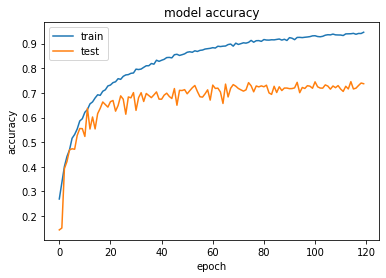

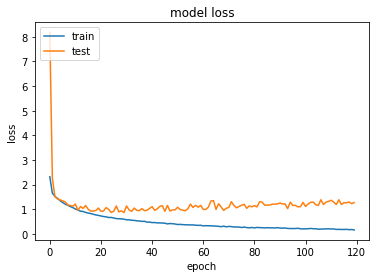

In [15]:
print(history.history.keys())
#history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Save model architecture [ JSON ]

In [16]:
model_json = model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)

#Save model weights [ h5 ]

In [17]:
model.save_weights("model_weights.h5")
print("save model to disk")

save model to disk
